<a href="https://colab.research.google.com/github/Beh-noush/General-Python/blob/main/FCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Neural Network with Pytorch

In [1]:
import torch
import torch.nn as nn
import torch.optim
import torch.nn.functional as F
from sklearn import datasets

A fully-connected 2-layer network with Relu non-linearity.

In [ ]:
# class FCNN(nn.Module):
#   def __init__(self, input_dim, hidden_dim, out_dim):
#     super(FCNN, self).__init__()
#     self.preactivation_hidden = nn.Linear(input_dim,hidden_dim)
#     self.preactivation_out = nn.Linear(hidden_dim, out_dim)

#   def forward(self, x):
#     """
#     Input:
#           1-d array
#           x is the input of the Neural Net of dimension input_dim
#     Returns:
#           1-d array of dimension out_dim. The score function output.
#     """
#     preactive_1 = self.preactivation_hidden(x)
#     active_1 = F.relu(preactive_1)
#     pre_output = self.preactivation_out(active_1)
#     output = F.relu(pre_output)
#     return output

# # Why is this code wrong? 


In [2]:
class FCNN(nn.Module):
  def __init__(self, input_dim, hidden_dim, out_dim):
    super(FCNN, self).__init__()
    self.preactivation_hidden = nn.Linear(input_dim,hidden_dim)
    self.activation_hidden = nn.ReLU()
    self.preactivation_out = nn.Linear(hidden_dim, out_dim)
    self.activation_out = nn.Softmax()

  def forward(self, x):
    """
    Input:
          1-d array
          x is the input of the Neural Net of dimension input_dim
    Returns:
          1-d array of dimension out_dim. The score function output.
    """
    preactive_1 = self.preactivation_hidden(x)
    active_1 = self.activation_hidden(preactive_1)
    pre_output = self.preactivation_out(active_1)
    output = self.activation_out(pre_output)
    return output



We use this neural net on Iris dataset.

In [3]:
iris = datasets.load_iris()

In [4]:
my_net = FCNN(4, 10, 3) 

Remember it was necessary to put .float() after your dataset, otherwise an error occured complaining about the dtype double rather than float! It seems a new error!

In [5]:
list(my_net.parameters()) #It contains weights and biases.

[Parameter containing:
 tensor([[ 0.1995,  0.0818, -0.4246, -0.4527],
         [ 0.0773, -0.2452,  0.3628, -0.1888],
         [-0.3147, -0.1261, -0.2421,  0.4663],
         [ 0.4060,  0.2842, -0.2482, -0.1095],
         [-0.4470, -0.2232,  0.1342, -0.1917],
         [-0.1137, -0.1112, -0.2761,  0.1828],
         [-0.0350, -0.2608,  0.3013, -0.1188],
         [ 0.2414,  0.0666,  0.3702, -0.2106],
         [ 0.0452, -0.1275,  0.4465,  0.1193],
         [ 0.3383, -0.2181,  0.0353, -0.3933]], requires_grad=True),
 Parameter containing:
 tensor([ 0.3984,  0.2551, -0.4139,  0.4249,  0.4494,  0.3685,  0.3349,  0.3989,
          0.4608, -0.2348], requires_grad=True),
 Parameter containing:
 tensor([[ 0.0978,  0.0225, -0.3120,  0.2516, -0.0959, -0.2599, -0.2708, -0.0433,
          -0.1541,  0.0471],
         [ 0.2003,  0.0466,  0.2691, -0.1362,  0.0175,  0.1486,  0.2067, -0.2627,
           0.2272, -0.1680],
         [ 0.2426, -0.2737, -0.0320,  0.0324,  0.2908,  0.0657, -0.1319,  0.1964,
     

To be added to this notebook!

1- Add test data and plot test acc and test loss. ***

2- Try with normalized data.

3- Save the results as well as the trained model and do another experiment with the loaded model! *******

4- Do PCA on the data.

5- Try other classifiers than FCNN.

6- Do updates on batches and not the whole dataset at each epoch! ***

In [6]:
#1- Add test data and plot test acc and test loss! 
#We can use the train-test-split function in SKLearn to make train and test splits of the entire dataset.
import sklearn.model_selection as model_selection
train_test_separated = model_selection.train_test_split(iris.data,iris.target, test_size = .1, random_state = 0)
train_data, test_data,train_label,test_label = train_test_separated

In [7]:
#We transform the splitted data arrays to pytorch tensors.
iris_train = torch.from_numpy(train_data)
iris_test = torch.from_numpy(test_data)
iris_train_labels = torch.from_numpy(train_label)
iris_test_labels = torch.from_numpy(test_label)

In [8]:
#Now, we train and test the model.
epochs = range(3000)
learning_rate = 1e-3
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_net.parameters(), lr = learning_rate)
iris_train = iris_train.float()
iris_test = iris_test.float()
#iris_labels_torch = torch.from_numpy(iris.target)
iris_train.requires_grad = True
train_acc_list = []
train_loss_list = []
test_acc_list = []
test_loss_list = []

for e in epochs:
   optimizer.zero_grad()
   output = my_net.forward(iris_train)
   predictions = torch.argmax(output, axis = 1)
   iris_loss = loss(output, iris_train_labels)
   iris_loss.backward()
   optimizer.step()
   accuracy = (predictions==iris_train_labels).float().mean()
   train_acc_list.append(accuracy)
   train_loss_list.append(iris_loss)

   test_output = my_net.forward(iris_test)
   test_preds = torch.argmax(test_output, axis = 1)
   iris_test_loss = loss(test_output, iris_test_labels)
   test_acc = (test_preds == iris_test_labels).float().mean()
   test_acc_list.append(test_acc)
   test_loss_list.append(iris_test_loss)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


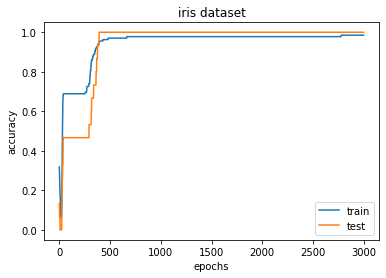

In [10]:
import matplotlib.pyplot as plt

plt.plot(epochs, train_acc_list, label = 'train')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('iris dataset')

plt.plot(epochs, test_acc_list, label = 'test')
plt.legend()

In [12]:
test_acc

tensor(1.)

In [ ]:
#3- Save the results as well as the trained model and do another experiment with the loaded model!

In [ ]:
results_dic = {'train_acc_list' : train_acc_list, 'test_acc_list': test_acc_list, 'train_loss_list': train_loss_list, 'test_loss_list': test_loss_list, 'model_parameters':list(my_net.parameters())}